# Program Assignment #4 - Linear Regression & Logistic Regression
---
## Name: 李勝維
## Student ID: 0711239
---

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
np.random.seed(0)
matplotlib.rcParams['text.usetex'] = True

# Linear Regression

# Data Generation

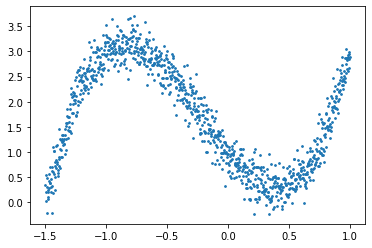

In [38]:
x = np.linspace(-1.5, 1.0, num=1002)[1:-1] # -1.5 < x < 1.0
epsilon = np.random.normal(0, 0.25, size=(1000,))
y = 3*x**3 + 2*x**2 - 3*x + 1 + epsilon

# plot
fig = plt.figure()
plt.scatter(x, y, s=3)
plt.show()
plt.close(fig)

# Data Preprocessing